In [33]:
import pandas as pd
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gzip 
import math
import itertools
from time import time
from tqdm import tqdm
import tqdm.notebook as tq
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import os
import vec_tools
import word_tools
import statistics
from nltk.corpus import stopwords
import random
import plotly.express as px
import plotly.graph_objs as go
from sklearn.decomposition import PCA
import seaborn as sns

# Create/load domains

In [34]:
lst_dir =  "G:/My Drive/KU/Thesis/data/domains/" 
domain_dic = {}

garg_lists = ["occupations1950.txt", "adjectives_appearance.txt",  'adjectives_appearance.txt',
 'adjectives_intelligencegeneral.txt', 'adjectives_otherization.txt', 'adjectives_princeton.txt',
 'adjectives_sensitive.txt', 'adjectives_williamsbest.csv', 'adjectives_williamsbest.txt',
 'personalitytraits_original.txt', 'occupations1950_professional.txt']

for dic in garg_lists:
    li = open(f"G:/My Drive/KU/Thesis/data/garg/{dic}", encoding="utf-8").readlines()
    domain_dic[dic[:-4]] = [el.strip() for el in li]

wiki_lists = ['sports','music_genres','lit_genres','us_cities','uk_cities',
               'countries','art_movs','hobbies','subcultures'] 
for lst in wiki_lists:
    domain_dic[lst] = word_tools.load_list(f"{lst_dir}/wiki/{lst}_wiki.txt")
    
manual_lists = [ 'virtues.txt', 'vices.txt', 'genres.txt', 'emotions.txt', 'housing.txt',
 'clothing.txt', 'white_trash.txt', 'old_rich.txt', 'new_rich.txt', 'u.txt', 'new_u.txt', 'non_u.txt',
 'refined.txt', 'unrefined.txt']

for dic in manual_lists:
    li = open(f"G:/My Drive/KU/Thesis/data/domains/{dic}").readlines()
    domain_dic[dic[:-4]] = [el.strip() for el in li]
domain_dic.keys()

domain_dic["goc_genres"] = ["hiphop", "rap", "bluegrass", "opera", "jazz", "techno", "punk"]

In [3]:
groups =['Iso_occupations.xlsx','standard_occupations_uk_incomplete.xlsx','occupations_1950_categorised.xlsx','vices_virtues.xlsx','u_non_u.xlsx','old_rich_new_rich.xlsx','emerging_traditional_genres.xlsx']
os.chdir("G:/My Drive/KU/Thesis/data/domains/dicts/")
os.listdir()
for group in groups: 
    domain_dic[group[:-5]] = vec_tools.load_domain_dic(f"G:/My Drive/KU/Thesis/data/domains/dicts/{group}")
   

In [4]:
professions = domain_dic["Iso_occupations"]["Professional"]


# Almighty iterator

In [5]:
coll = "histwords_engall"#"gb_12_18_02"#
#input_dir = f"D:/google_ngrams/vectors/{coll}"
dims = ["affluence", "cultivation", "status", "gender", "race", "morality", "education"]
histwords_iter = vec_tools.AllDecsIterator(coll, dims, kv=True, test=False)
histwords_iter.iterate()

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]
G:\My Drive\KU\Thesis\vec_tools.py:161: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
G:\My Drive\KU\Thesis\vec_tools.py:152: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot)


In [5]:
coll = "gb_12_18_02"
#print(eval_coha.vals)
gb_12_iter = vec_tools.AllDecsIterator(coll, dims, kv=False, test=False)
gb_12_iter.iterate()
dists = gb_12_iter.stability_through_time(n = 500)
#iterator.avg_distance(n=50)

coll = "histwords_engfic"
gb_12_iter = vec_tools.AllDecsIterator(coll, dims, kv=True, test=False)
gb_12_iter.iterate()
ef = gb_12_iter.stability_through_time(n = 500)
#iterator.avg_distance(n=50)

coll = "histwords_coha"
gb_12_iter = vec_tools.AllDecsIterator(coll, dims, kv=True, test=False)
gb_12_iter.iterate()
co = gb_12_iter.stability_through_time(n = 500)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]
G:\My Drive\KU\Thesis\vec_tools.py:161: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
G:\My Drive\KU\Thesis\vec_tools.py:152: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot)


KeyboardInterrupt: 

In [20]:
comp = pd.concat([df.loc["1990"],dists.loc["1990"], ef.loc["1990"],co.loc["1990"]], axis=1)
comp.columns = ["ENG_ALL", "GB_12", "ENG_FIC", "COHA"]
comp.index = ["Function words", "Random words"]
c = comp
for i in range(4):
    for j in range(2):
        c.iloc[j, i] = str(c.iloc[j, i])[1:-1].replace(",", "")
print(c.to_latex())

\begin{tabular}{lllll}
\toprule
{} &              ENG\_ALL &                GB\_12 &             ENG\_FIC &                 COHA \\
\midrule
Function words &   0.08 [0.078 0.082] &   0.633 [0.626 0.64] &  0.067 [0.065 0.07] &   0.05 [0.048 0.052] \\
Random words   &  0.397 [0.394 0.399] &  1.413 [1.404 1.421] &  0.248 [0.245 0.25] &  0.237 [0.235 0.239] \\
\bottomrule
\end{tabular}



In [12]:
vec_tools.to_latex(df, "function_word_stability")

# Correlating with 1990 census

In [35]:
coll = "histwords_engall"
decade_files = [str(1900+10*i)+'_model' for i in range(10)]
eval_iter = vec_tools.EvalEmbeddings(dir = f"D:/google_ngrams/Vectors/{coll}/", files = decade_files, kv=True, dl=False)
eval_iter.load_wv(decade_files[-1])

outliers_aff = ["Dancers and dancing teachers", "Musicians and music teachers", "Designers", 
 "Painters, except construction or maintenance", "Authors", "Artists and art teachers",
"Photographers", "Dentists", "Physicians and surgeons", "Policemen and detectives", "Sports instructors and officials",
           "Lawyers and judges", "Airplane pilots and navigators", "Vetinarians", #more questionable second round
            "Stock and bond salesman","Sailors and deck hands"]
outliers_status = ["Members of the armed services", "Tool makers, and die makers, and setters", "Painters, except construction and maintenance"]

print(eval_iter.corr_census(decade_files[-1],labels="wods", outliers = outliers_aff))

{'Education_survey_corr': (0.4830379693677336, 2.471217502585019e-06), 'Status_survey_corr': (0.5966023356783157, 1.3464116204742447e-09), 'Affluence_survey_corr': (0.3494423433078637, 0.0009744819294407855)}


C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]
G:\My Drive\KU\Thesis\vec_tools.py:161: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


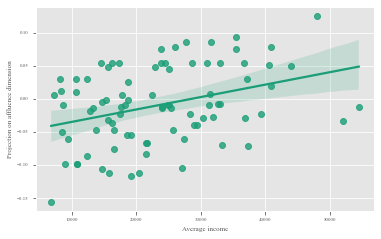

In [32]:
plt.rcParams['figure.figsize'] = (6.062958350629584, 3.747114333064086)
sns.regplot(eval_iter.vals["Affluence_survey"],eval_iter.vals["Affluence_proj"], color=colours)
plt.xlabel("Average income",fontsize = 7)
plt.ylabel("Projection on affluence dimension",fontsize = 7)
plt.tick_params(axis='both', which='major', labelsize=5)
colours = cm.Dark2(np.linspace(0, 1, 7))[0]
for i, occ in enumerate (eval_iter.vals.index):
    if occ in outliers_aff:
        if occ not in ["Sports instructors and officials","Sailors and deck hands"]:
            plt.annotate(occ, (surv[i]+50, proj[i]+0.005), fontsize = 5)

plt.savefig("G:/My Drive/KU/Thesis/outputs/graphs/occ_aff_after.jpg", dpi=400, bbox_inches = "tight")

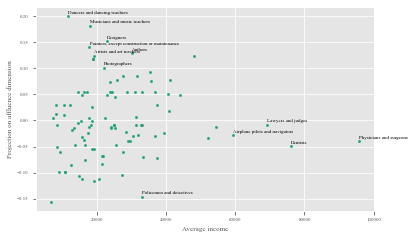

In [24]:
from matplotlib import cm
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=((6.062958350629584, 3.747114333064086)))
surv = eval_iter.vals['Affluence_survey']
proj = eval_iter.vals['Affluence_proj']
#sns.scatterplot(data=eval_coha.vals,x='Affluence_survey', y="Affluence_proj")
colours = cm.Dark2(np.linspace(0, 1, 7))[0]
plt.scatter(surv, proj, color=colours, s =5)
plt.xlabel("Average income",fontsize = 7)
plt.ylabel("Projection on affluence dimension",fontsize = 7)
plt.tick_params(axis='both', which='major', labelsize=5)
# Annotate label points

plt.rcParams["font.family"] = "Times New Roman"
for i, occ in enumerate (eval_iter.vals.index):
    if occ in outliers_aff:
        if occ not in ["Sports instructors and officials","Sailors and deck hands"]:
            plt.annotate(occ, (surv[i]+50, proj[i]+0.005), fontsize = 5)
#eval_coha.vals.plot.scatter(x="Affluence_survey",y="Affluence_proj")
plt.savefig("G:/My Drive/KU/Thesis/outputs/graphs/occ_aff.jpg", dpi=400, bbox_inches = "tight")

# Correlation with all decades

In [37]:
def corr_census(self, model, labels="words", outliers=[], table=False):
        survey = pd.read_csv("G:/My Drive/KU/Thesis/data/us_census/census_1990_OCC1950.csv", index_col = 0)
        occ_map = pd.read_csv("G:/My Drive/KU/Thesis/data/garg/occupation_map.csv", index_col="Occupation, 1950 basis").to_dict()["Single words"]
                           
        occs = {v: k for k, v in occ_map.items() if type(v) != list}
        capitals = {"EDUC":"Education", "PRESGL":"Status", "INCTOT":"Affluence"}
        cats = capitals.values()
        capitals = {v: k for k, v in capitals.items()}

        ant_pairs = {}
        vals = {}
        projs = {}
        dims = {}
        embed = self.models[model]
        self.vals = {}

        for cat in cats:
            #print(domain, cat)
            ant_pairs[cat] = pd.read_csv(f"G:/My Drive/KU/Thesis/data/word_pairs/{cat}_antonyms_goc.csv", header = None, names = ("pos_ant", "neg_ant"))
            ant_pairs[cat] = ant_pairs[cat].rename(columns= {"pos_ant":ant_pairs[cat].iloc[0,0],"neg_ant":ant_pairs[cat].iloc[0,1]})
            #prepare dictionaries for survey & projection values
            vals[cat + "_survey"] = {}
            vals[cat + "_proj"] = {}
            #calculate dimensions from antonym pairs
            dims[cat] = create_dim_avg(embed, ant_pairs[cat])
            #project embeddings onto dimension
            projs[cat] = self.proj_dim(model, dims[cat])
            #iterate through words
            not_in_vocab = []
            nan = False
            for index, row in survey.iterrows():
                #print(index, row)
                try:
                    if row.name in outliers:
                        continue
                    #print( occ_map[row.name])
                    occ_spl = occ_map[row.name].lower().split()
                #    print(occ_spl)
                    w_projs = []
                    for w in occ_spl:
                        if w == "nan":
                            continue
                        if w[-1] == ",":
                            w = w[:-1]
                        try:
                            ind = embed.get_index(w)
                            proj = projs[cat][ind]
                        except: 
                            continue
                        if proj != proj:
                            continue
                        w_projs.append(proj)
                    #    print(row.name, w_projs)
                        val = np.mean(w_projs)
                        #add all to DF
                        if labels == "words":
                            label =  occ_map[row.name].title()
                        else:
                            label =  row.name
                        vals[cat + "_survey"][label] = row[capitals[cat] + "_mean"]
                        vals[cat + "_proj"][label] = val
                except Exception as e:
                    pass
                    #print(e)
                    #not_in_vocab.append(word)

         #   print(f"{not_in_vocab} not in embeddings vocab!")
        self.vals = pd.DataFrame(vals)
        corrs = {}
        table_corrs = {}
        for cat in cats:
           # print(self.vals[domain][cat + "_survey"], self.vals[domain][cat + "_proj"])
           # print(self.vals[cat + "_survey"], self.vals[cat + "_proj"])
            corrs[cat + "_survey_corr"] = pearsonr(self.vals[cat + "_survey"], self.vals[cat + "_proj"])
            pear = pearsonr(self.vals[cat + "_survey"], self.vals[cat + "_proj"])
            v = round(pear[0],3)
            if pear[1] < 0.001:
                v = str(v) + "***"
            elif pear[1] < 0.01:
                v = str(v) + "**"
            elif pear[1] < 0.05:
                v = str(v) + "*"
            else:
                v = str(v)
            table_corrs[cat.title()] = v
            #corrs[cat + "_survey_corr"] = self.vals[[cat + "_survey", cat + "_proj"]].corr(method="pearson").iloc[0,1]
        if table:
            return table_corrs
        return corrs


In [44]:
decade_files = [str(1900+10*i)+'_model' for i in range(10)]
decade_dic = {str(1950+10*i):str(1900+10*i) +'_model' for i in range(5)}
coll = "histwords_engall"
eval_iter = vec_tools.EvalEmbeddings(dir = f"D:/google_ngrams/Vectors/{coll}/", files = decade_files, kv=True, dl=False)
census_corrs = {}
for dec, model in decade_dic.items():
    eval_iter.load_wv(model)
    census_corrs[dec] = eval_iter.corr_census(model, labels="wors", outliers=outliers_aff, table=True)
print(pd.DataFrame(census_corrs).to_latex())

G:\My Drive\KU\Thesis\vec_tools.py:161: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]
G:\My Drive\KU\Thesis\vec_tools.py:161: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]
G:\My Drive\KU\Thesis\vec_tools.py:161: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis

\begin{tabular}{llllll}
\toprule
{} &      1950 &      1960 &      1970 &      1980 &      1990 \\
\midrule
Education &   0.363** &    0.272* &  0.427*** &  0.383*** &  0.477*** \\
Status    &  0.445*** &  0.589*** &  0.583*** &  0.614*** &  0.585*** \\
Affluence &     0.167 &     0.107 &  0.382*** &   0.317** &     0.156 \\
\bottomrule
\end{tabular}



# PCA

In [22]:
wv1990 = histwords_iter.wvs["1990"]
dic = domain_dic["Iso_occupations"]
topns = [len(val) for key, val in dic.items()] #amount in each list
sims = []
centroids = []
for key, val in dic.items():
    sims.extend(val)
    centroids.append(key)
#vec_tools.display_pca_scatterplot_3D(model=wv1990, similars=False, user_input=centroids, words=sims, topns=topns)

In [ ]:
vec_tools.display_pca_scatterplot_2D(model=wv1990, similars=False, user_input=centroids, words=sims, topns=topns)

In [ ]:
vec_tools.display_pca_scatterplot_3D(model=wv1990, similars=False, user_input=centroids, words=sims, topns=topns)

In [15]:
from matplotlib import cm
def chart_project_dict(proj_1, p1_label, proj_2, p2_label, title, domain_dic, wv, dim_1_span, dim_2_span, undesire=[], no = [],show=True):
    inds = []
    projs = {cat: {"dim_1": {}, "dim_2": {}} for cat in domain_dic.keys()}
    means = {cat: {"dim_1": [], "dim_2": []} for cat in domain_dic.keys()}
  #  means["General"] = {"dim_1": [0], "dim_2": [0]}
   # projs["General"] = {"dim_1": [0], "dim_2": [0]}

    for cat, lst in domain_dic.items():
        for word in lst:
            if word.lower() in no:
                continue
            try:
                ind = wv.get_index(word.lower())
                inds.append(ind)
                val1, val2 = proj_1[ind], proj_2[ind]
                means[cat]["dim_1"].append(val1)
                means[cat]["dim_2"].append(val2)
                #projs = (val1, val2)
                projs[cat]["dim_1"][word] = val1
                projs[cat]["dim_2"][word] = val2
                
            except Exception as e:
                continue
   
    for cat in means.keys():
        means[cat]["dim_1"] = statistics.mean(means[cat]["dim_1"])
        means[cat]["dim_2"] = statistics.mean(means[cat]["dim_2"])
    #means["General"]["dim_1"] = statistics.mean([means[cat]["dim_1"] for cat in means.keys() if cat != "General"])
    #means["General"]["dim_2"] = statistics.mean([means[cat]["dim_2"] for cat in means.keys() if cat != "General"])

    #return projs
    plt.style.use("ggplot")
    plt.rcParams["font.family"] = "Times New Roman"

    colours = list(cm.Dark2(np.linspace(0, 1, 7))) + ["skyblue", "rosybrown", "khaki", "black"]
    #colours = {i: colour["color"] for i, colour in enumerate(plt.rcParams['axes.prop_cycle'])}
    #colours = ["red", "yellow", "blue", "orange", "green", "purple", "teal", "#CD9575", "#665D1E", "#915C83", "#841B2D", "#C46210", "#9966CC", "#0D98BA", "#4D1A7F", "#003153"]
    fig, ax = plt.subplots(figsize=((6.062958350629584, 3.747114333064086)))
    ax.set_xlabel(p1_label, fontsize=7)
    ax.set_ylabel(p2_label, fontsize=7)
    ax.set_xlim(left=dim_1_span[0], right=dim_1_span[1])
    ax.set_ylim(bottom=dim_2_span[0], top=dim_2_span[1])
    x = ax.axvline(x=0, c="silver", clip_on=False, linewidth=1)#, label="x=0")
    y = ax.axhline(y=0, c="silver", clip_on=False, linewidth=1)#, label="y=0")
    x.set_clip_on(False)
    y.set_clip_on(False)
    ax.tick_params(axis='x',labelsize=6, zorder=1)
    ax.tick_params(axis='y',labelsize=6, zorder=1)
    #ax.axvline(x=means["General"]["dim_1"], c="silver")#, label="x=0")
    #ax.axhline(y=means["General"]["dim_2"], c="silver")#, label="y=0")
    ax
    i = 0
    for cat, dic in projs.items():
        ax.scatter(means[cat]["dim_1"], means[cat]["dim_2"], marker = "o", s=50, color = colours[i])
        ax.annotate(text= "", xy=(means[cat]["dim_1"], means[cat]["dim_2"]), zorder=2, size = 5,
                    xytext= (3,-8), textcoords="offset points", style="italic" )
        df = pd.DataFrame(dic)
        ax.scatter(df.loc[:, "dim_1"], df.loc[:, "dim_2"], clip_on=True, label=cat, s=25, marker="o", zorder=2, alpha= 0.8, color=colours[i])
        for idx, row in df.iterrows():
            if row.name.lower() in undesire:
                continue
            ax.annotate(text=row.name.capitalize(), xy=(row["dim_1"], row["dim_2"]), xytext= (3,-5), size=5, textcoords="offset points" )
        i += 1
    ax.legend(prop={'size': 5})
    plt.savefig(title, format="png")
    if show == False:
        plt.clf()

dict_keys(['Managers', 'Professional', 'Technicians and associate professionals', 'Clerical support workers', 'Service and sales workers', 'Skilled agricultural, forestry and fishery workers', 'Craft and related trades ', 'Plant and machine operators, and assemblers', 'Elementary occupations', 'Armed forces occupations'])


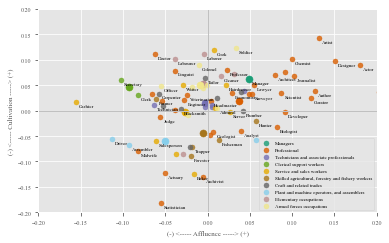

In [17]:
wv = histwords_iter.wvs["1990"]
print(domain_dic["Iso_occupations"].keys())
undesire = ["professional", "commander", "bartender","operator", "mathematician","janitor", "builder","supervisor", "electrician", "operator","auctioneer", "corporal", "toolmaker","trapper" "surveyor", "helper","trades","teacher", "broker", "coach", "brigadier", "beautician", "sergeant", "surgeon","librarian", "administrator", "programmer", "weaver", "nurse"]
no = ["professional"]
chart_project_dict(proj_1=histwords_iter.projs["1990"]["affluence"],
                                    p1_label="(-) <----- Affluence -----> (+)",
                                    proj_2=histwords_iter.projs["1990"]["cultivation"],
                                    p2_label="(-) <----- Cultivation -----> (+)",
                                    title="Professions",
                                    domain_dic=domain_dic["Iso_occupations"],
                                    undesire=undesire,
                                    wv=wv,
                                    no = no,
                                    show=True,
                                    dim_1_span=(-.2,.2),
                                    dim_2_span= (-.2,.2)
                            )
plt.savefig("G:/My Drive/KU/Thesis/outputs/graphs/iso_occs.jpg", dpi=400, bbox_inches = "tight")

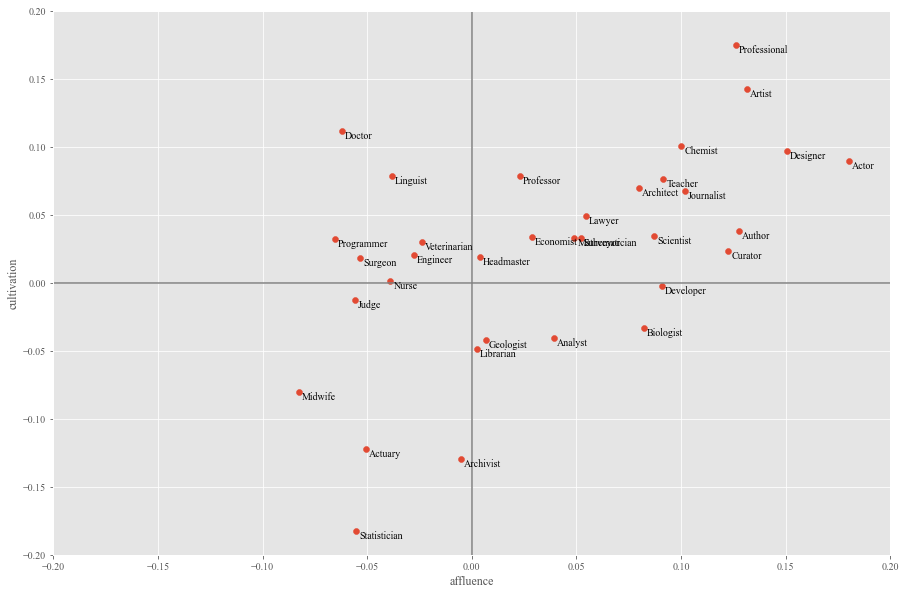

In [14]:
vec_tools.chart_project(proj_1=histwords_iter.projs["1990"]["affluence"], 
                                    p1_label="affluence", 
                                    proj_2=histwords_iter.projs["1990"]["cultivation"], 
                                    p2_label="cultivation",
                                    title="Professions", 
                                    word_list=professions, 
                                    wv=wv, 
                                    show=True,
                                    dim_1_span=(-.2,.2),
                                    dim_2_span= (-.2,.2)
                            )

# 1900-1990 comparison

In [ ]:
!pip install -U kaleido

In [ ]:
#line graph
word_list = domain_dic["occupations1950"][:7]
word_projs = {word: {} for word in word_list}
year_1, year_2 = ["1900", "1990"]
dim = "affluence"

for dec in [year_1, year_2]:
    for word in word_list:
        ind = self.wvs[dec].get_index(word.lower())
        proj = self.projs[dec][dim][ind]
        word_projs[word][dec] = proj
df = pd.DataFrame(word_projs)
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10,5)
df.plot.line()
#df.unstack()

In [ ]:
#polar graph *NEEDS GRADIATION of colour
import plotly.express as px
px.line_polar(df, r="frequency", theta="direction", color="strength", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)